<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" align="left" height=100 width=200>

🚀 [**`Kaggle - Shelter Animal Outcomes`**](https://www.kaggle.com/competitions/shelter-animal-outcomes) 🚀

# 📚 Libraries

In [1]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np
import gzip

# DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#  🐈 Dataset

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [3]:
data_test = pd.read_csv('test.csv')
data_test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [4]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,1,0,0,0,0
1,2,1,0,0,0,0
2,3,1,0,0,0,0
3,4,1,0,0,0,0
4,5,1,0,0,0,0


In [5]:
print(f'The shape of the data_train dataset is: {data_train.shape}')
print(f'The shape of the data_test dataset is: {data_test.shape}')
print(f'The shape of the sample_submission dataset is: {sample_submission.shape}')

The shape of the data_train dataset is: (26729, 10)
The shape of the data_test dataset is: (11456, 8)
The shape of the sample_submission dataset is: (11456, 6)


In [6]:
print(data_train.dtypes.value_counts())
print('--'*50)
print(data_test.dtypes.value_counts())
print('--'*50)
print(sample_submission.dtypes.value_counts())

object    10
dtype: int64
----------------------------------------------------------------------------------------------------
object    7
int64     1
dtype: int64
----------------------------------------------------------------------------------------------------
int64    6
dtype: int64


# 🧹 Cleaning the dataset

## 👥 Duplicates?

In [7]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())
print(sample_submission.duplicated().sum())

0
0
0


## ❓ Missing values?

<AxesSubplot:>

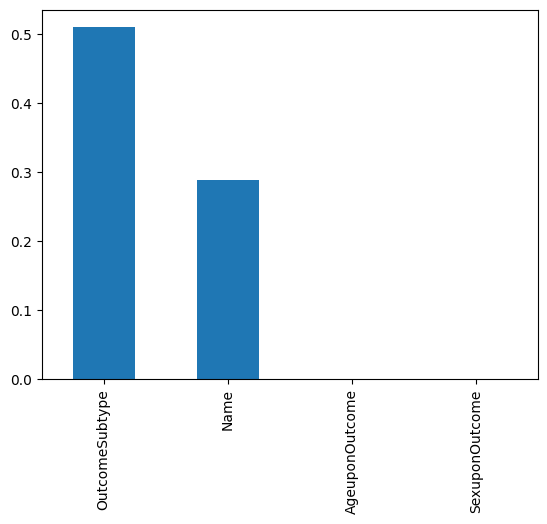

In [8]:
total_missing_data_train = (data_train.isna().sum()/len(data_train)).sort_values(ascending=False)
missing_mask_train = total_missing_data_train > 0
real_missing_values_train = total_missing_data_train[missing_mask_train]
real_missing_values_train.plot.bar()

<AxesSubplot:>

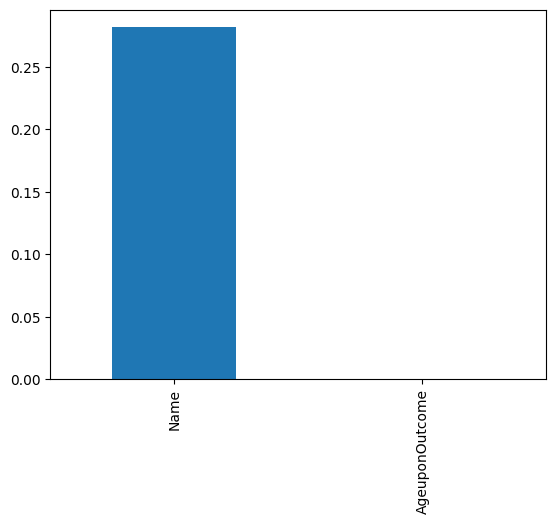

In [9]:
total_missing_data_test = (data_test.isna().sum()/len(data_test)).sort_values(ascending=False)
missing_mask_test = total_missing_data_test > 0
real_missing_values_test = total_missing_data_test[missing_mask_test]
real_missing_values_test.plot.bar()

**`Data_train 'OutcomeSubtype' & 'Name'`**

In [10]:
data_train["OutcomeSubtype"].value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [11]:
data_train.fillna('Unknown', inplace=True)

In [12]:
data_train['OutcomeSubtype'].value_counts()

Unknown                13612
Partner                 7816
Foster                  1800
SCRP                    1599
Suffering               1002
Aggressive               320
Offsite                  165
In Kennel                114
Behavior                  86
Rabies Risk               74
Medical                   66
In Foster                 52
Enroute                    8
Court/Investigation        6
At Vet                     4
In Surgery                 3
Barn                       2
Name: OutcomeSubtype, dtype: int64

In [13]:
data_train['AnimalType'].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

We can see there are 2 types of animals: cats 🐈 and dogs 🐕. We can thus split the dataset in two to predict the best outcome for each.

In [31]:
train_dogs = data_train[data_train['AnimalType'] == 'Dog']
train_dogs

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
4,A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,Unknown,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
...,...,...,...,...,...,...,...,...,...,...
26716,A697158,Max,2015-05-02 21:04:00,Adoption,Offsite,Dog,Neutered Male,2 months,Newfoundland Mix,White/Black
26717,A519949,Bella,2014-06-30 17:34:00,Return_to_owner,Unknown,Dog,Spayed Female,9 years,Bullmastiff Mix,Black
26718,A701044,Unknown,2015-04-28 14:26:00,Adoption,Unknown,Dog,Neutered Male,2 months,Siberian Husky/German Shepherd,Black/Tricolor
26723,A716997,Zeus,2016-01-29 18:52:00,Adoption,Unknown,Dog,Neutered Male,6 years,Staffordshire Mix,Blue/White


In [32]:
train_cats = data_train[data_train['AnimalType'] == 'Cat']
train_cats

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
3,A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,Unknown,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
10,A668402,Unknown,2013-12-05 15:50:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black
...,...,...,...,...,...,...,...,...,...,...
26722,A687056,Unknown,2014-08-31 09:00:00,Transfer,SCRP,Cat,Intact Male,5 months,Domestic Shorthair Mix,Orange Tabby
26724,A702446,Unknown,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,Unknown,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26727,A677478,Unknown,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


We redo the same operation for the test dataset.

In [33]:
test_dogs = data_test[data_test['AnimalType'] == 'Dog']
test_cats = data_test[data_test['AnimalType'] == 'Cat']

We can thus remove the entire AnimalType column for each.

In [35]:
test_dogs.drop('AnimalType', axis=1, inplace=True)
test_cats.drop('AnimalType', axis=1, inplace=True)
train_cats.drop('AnimalType', axis=1, inplace=True)
train_dogs.drop('AnimalType', axis=1, inplace=True)

/tmp/ipykernel_1612/670608345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dogs.drop('AnimalType', axis=1, inplace=True)
/tmp/ipykernel_1612/670608345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cats.drop('AnimalType', axis=1, inplace=True)
/tmp/ipykernel_1612/670608345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats.drop('AnimalType', axis=1, inplace=True)
/tmp/ipykernel_1612/670608345.py:4: Set

In [37]:
test_dogs = test_dogs.reset_index()
test_cats = test_cats.reset_index()
train_dogs = train_dogs.reset_index()
train_cats = train_cats.reset_index()

In [39]:
test_dogs.drop('index', axis=1, inplace=True)
test_cats.drop('index', axis=1, inplace=True)
train_dogs.drop('index', axis=1, inplace=True)
train_cats.drop('index', axis=1, inplace=True)

But we still want to keep the ID of each animal.

In [55]:
dog_test_ID = test_dogs["ID"].to_numpy()
dog_test_ID = np.array([dog_test_ID])
dog_test_ID = dog_test_ID.T
test_dogs.drop("ID", axis=1, inplace=True)
cat_test_ID = test_cats["ID"].to_numpy()
cat_test_ID = np.array([cat_test_ID])
cat_test_ID = cat_test_ID.T
test_cats.drop("ID", axis=1, inplace=True)

In [57]:
test_dogs

,Name,DateTime,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Summer,2015-10-12 12:15:00,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Cheyenne,2014-07-26 17:59:00,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Pongo,2013-12-28 18:12:00,Intact Male,4 months,Collie Smooth Mix,Tricolor
3,Skooter,2015-09-24 17:59:00,Neutered Male,2 years,Miniature Poodle Mix,White
4,Beau,2015-06-23 11:17:00,Neutered Male,3 years,Beagle Mix,Brown/White
...,...,...,...,...,...,...
6651,NaN,2014-08-17 17:48:00,Spayed Female,2 months,Labrador Retriever Mix,Brown
6652,Caicos,2015-07-20 14:55:00,Spayed Female,6 months,Bearded Collie Mix,Blue Merle/White
6653,Cosmo,2015-11-05 17:19:00,Neutered Male,10 months,Staffordshire Mix,Tan/White
6654,Rambo,2015-09-05 17:16:00,Neutered Male,6 years,German Shepherd Mix,Black/Tan


## 🎯 Define features and target

In [58]:
y_train_dogs = train_dogs['OutcomeType']
x_train_dogs = train_dogs.drop(columns=['OutcomeType'])
y_train_cats = train_cats['OutcomeType']
x_train_cats = train_cats.drop(columns=['OutcomeType'])